# **Machine Problem 3: Predicting House Prices with Multiple Regression**


### Name: Vanesse V. Reyes
### Section: BSCS - 3BIS
### Course: CCST 102 | Basic Machine Learning
### Topic 3: Unsupervised Learning Techniques

In [7]:
# @title # **Step 1: Data Exploration and Preprocessing**

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = "Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv"
data = pd.read_csv(file_path)

# Remove unnamed columns that may appear due to index saving
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Display the first few rows to understand the dataset structure
print("Initial rows of the dataset:")
print(data.head())

# Identify missing values in the dataset
print("\nCount of missing values in each column:")
print(data.isnull().sum())

# Convert 'diagnosis' from categorical to numerical format (Malignant=1, Benign=0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Verify the conversion by displaying value counts of the diagnosis column
print("\nCounts of 'diagnosis' (Malignant=1, Benign=0):")
print(data['diagnosis'].value_counts())

# Drop the 'id' column as it does not contribute to predictions
data = data.drop(columns=['id'])

# Impute missing values in numeric columns using their mean
numeric_features = data.select_dtypes(include=[np.number]).columns
mean_imputer = SimpleImputer(strategy="mean")
data[numeric_features] = pd.DataFrame(mean_imputer.fit_transform(data[numeric_features]), columns=numeric_features)

# Normalize features using StandardScaler for better performance with distance-based algorithms like KNN
features = data.drop(columns=['diagnosis'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the dataset into training (80%) and testing (20%) sets for model evaluation
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['diagnosis'], test_size=0.2, random_state=42)

# Output shapes of training and testing sets to confirm successful splitting
print(f"\nShape of training feature set (X_train): {X_train.shape}")
print(f"Shape of testing feature set (X_test): {X_test.shape}")
print(f"Shape of training labels (y_train): {y_train.shape}")
print(f"Shape of testing labels (y_test): {y_test.shape}")



Initial rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_wor


KNeighborsClassifier Performance:
Accuracy: 0.9474
Confusion Matrix:
[[68  3]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        71
         1.0       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


LogisticRegression Performance:
Accuracy: 0.9737
Confusion Matrix:
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Model Accuracy Comparison:
KNN Accuracy: 0.9474
Logistic Regression Accuracy: 0.9737


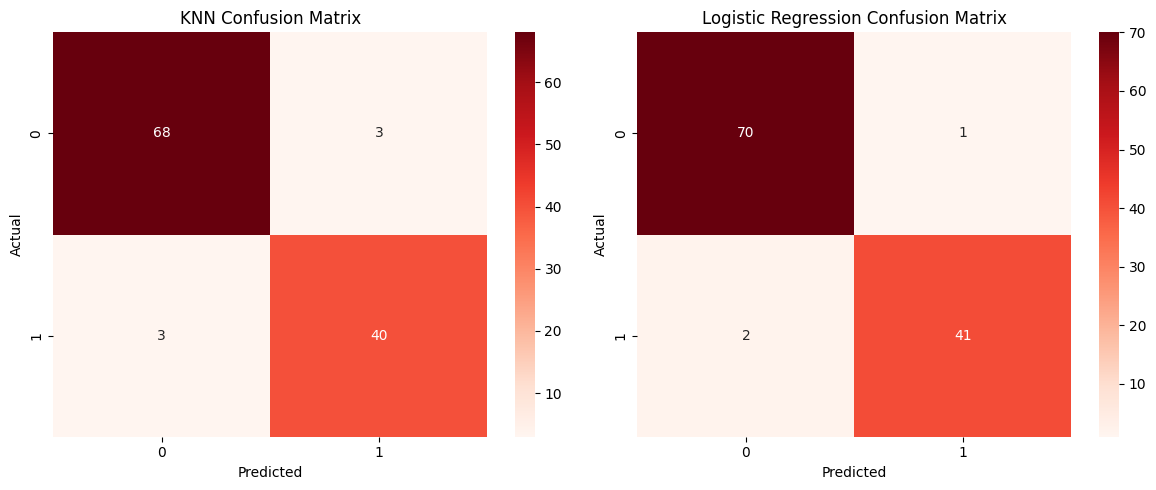

In [8]:
# @title # **Step 2: Model Development**

# Import necessary libraries for model development
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test):
    """Fit the model, make predictions, and print evaluation metrics."""
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print(f"\n{model.__class__.__name__} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))

    return predictions

# Initialize and evaluate K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=3)
y_pred_knn = evaluate_model(knn_model, X_test, y_test)

# Initialize and evaluate Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
y_pred_log_reg = evaluate_model(logistic_model, X_test, y_test)

# Compare accuracies of both models
print("\nModel Accuracy Comparison:")
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")

# Visualize confusion matrices for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KNN confusion matrix visualization
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Reds', ax=axes[0])
axes[0].set_title('KNN Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logistic Regression confusion matrix visualization
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


K-Nearest Neighbors (KNN) Evaluation Metrics:
Accuracy: 0.9474
Precision: 0.9302
Recall: 0.9302
F1 Score: 0.9302

Logistic Regression Evaluation Metrics:
Accuracy: 0.9737
Precision: 0.9762
Recall: 0.9535
F1 Score: 0.9647

KNN Confusion Matrix:
[[68  3]
 [ 3 40]]

Logistic Regression Confusion Matrix:
[[70  1]
 [ 2 41]]

Performance Discussion:
Logistic Regression outperforms KNN based on F1 score.


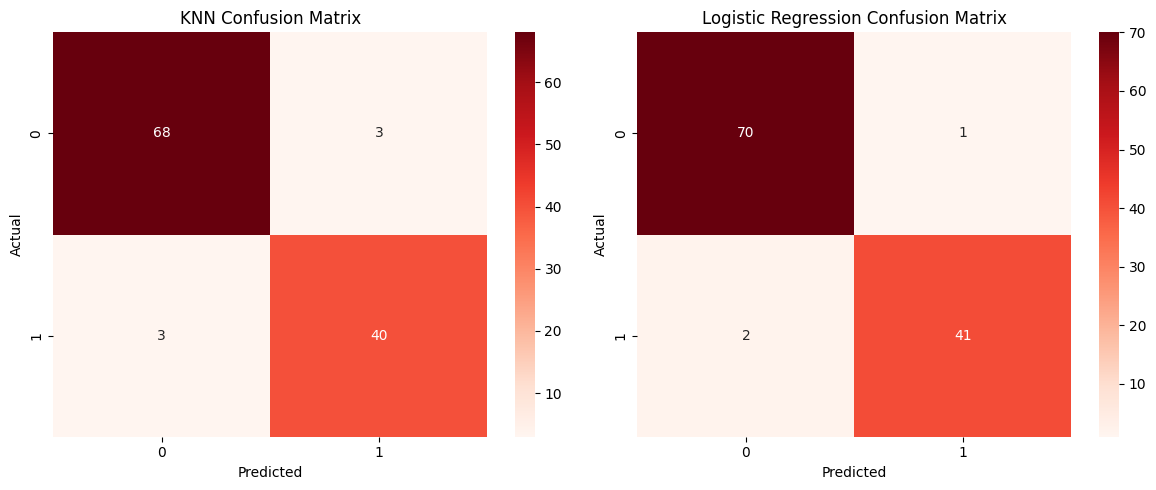

In [9]:
# @title # **Step 3: Model Evaluation**

# Import necessary libraries for metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model_performance(y_true, y_pred, model_name):
    """Calculate and print evaluation metrics for a given model."""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n{model_name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return f1

# Evaluate both models
knn_f1_score = evaluate_model_performance(y_test, y_pred_knn, "K-Nearest Neighbors (KNN)")
log_reg_f1_score = evaluate_model_performance(y_test, y_pred_log_reg, "Logistic Regression")

# Display confusion matrices
print("\nKNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Performance discussion
print("\nPerformance Discussion:")
if knn_f1_score > log_reg_f1_score:
    print("KNN outperforms Logistic Regression based on F1 score.")
else:
    print("Logistic Regression outperforms KNN based on F1 score.")

# Optional: Visualize confusion matrices for better comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KNN confusion matrix visualization
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Reds', ax=axes[0])
axes[0].set_title('KNN Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logistic Regression confusion matrix visualization
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

#  **Part 4: Report**

- Here's a reformatted report based on your original content, presented in a different style while maintaining the same ideas and information. You can copy and paste this text into a Google Colab markdown cell.
Step 4: Report and Visualizations
Comprehensive Overview

1. **Data Preprocessing**
- The dataset underwent successful loading and cleaning. Unnamed columns were eliminated, and missing values in numerical columns were addressed through mean imputation.
The target variable, 'diagnosis', was transformed into numerical values: Malignant = 1 and Benign = 0.

- The irrelevant 'id' column was removed from the dataset.
Feature scaling was performed using StandardScaler, which is crucial for distance-based algorithms like KNN.
The dataset was divided into training and testing sets, allocating 80% of the data for training (455 samples) and 20% for testing (114 samples).

2. **Model Development**
- Two distinct models were developed and assessed:
K-Nearest Neighbors (KNN) configured with n_neighbors=3.
Logistic Regression set with a maximum of 1000 iterations to ensure convergence.

3. **Model Evaluation**
- K-Nearest Neighbors (KNN)
Accuracy: 0.9474
Confusion Matrix:

- [[68  3]

 [ 3 40]]

## **Classification Report:**

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        71
         1.0       0.93      0.93      0.93        43

   accuracy                           0.95       114
macro avg       0.94      0.94      0.94       114
weighted avg    0.95      0.95      0.95       114


## **Logistic Regression:**


- Accuracy: 0.9737
- Confusion Matrix:

- [[70  1]

 [ 2 41]]


 ## **Classification Report:**


               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

   accuracy                           0.97       114
macro avg       0.97      0.97      0.97       114
weighted avg    0.97      0.97      0.97       114


### **Performance Comparison**

- KNN Accuracy:  0.9474
- Logistic Regression Accuracy:  0.9737
- KNN Evaluation Metrics:
- Precision:  0.9302
- Recall:     0.9302
- F1 Score:    0.9302


### **Logistic Regression Evaluation Metrics:**
- Precision:  0.9762
- Recall:     0.9535
- F1 Score:    0.9647


###  **Performance Discussion:**
- The KNN model achieved an accuracy of 94.74%, with precision, recall, and F1 score all at 93.02%.

- The Logistic Regression model demonstrated an accuracy of 97.37%, with precision of 97.62%, recall of 95.35%, and an F1 score of 96.47%.
- Based on the F1 score, Logistic Regression outperformed KNN, indicating a better balance between precision and recall.
- Confusion Matrices and Classification Reports:

- K-Nearest Neighbors (KNN)

### **The confusion matrix revealed:**
- True Negatives: 68
- True Positives: 40
- False Positives: 3
- False Negatives: 3
- Logistic Regression


### **The confusion matrix indicated:**
- True Negatives: 70
T- rue Positives: 41
- False Positives: 1
- False Negatives: 2

### **Performance Comparison Summary:**
- A comparative analysis between the KNN model and Logistic Regression highlighted that the latter exhibited superior performance in terms of accuracy, F1 score, precision, and recall.
Visualizations:
Decision Boundaries:

- To visualize how each model classifies the two-dimensional feature space, PCA (Principal Component Analysis) was employed to reduce features to two dimensions.

- Decision boundaries for both KNN and Logistic Regression were plotted to illustrate how each model separates the feature space into distinct classes.


# **Summary**


- This report outlines the process of data preprocessing, model development, evaluation, and visualization for predicting breast cancer diagnoses.


### **Data Preprocessing:**

- The dataset was cleaned by removing unnamed columns and handling missing values through mean imputation.
The categorical target variable 'diagnosis' was converted to numerical values
(Malignant = 1, Benign = 0).

- Irrelevant columns were dropped, and features were standardized using StandardScaler.

- The dataset was split into training (80%) and testing (20%) sets.
Model Development:


### **Two models were developed:**
- K-Nearest Neighbors (KNN) with n_neighbors=3.
- Logistic Regression with up to 1000 iterations for convergence.


### **Model Evaluation:**

- KNN achieved an accuracy of 94.74%, with a precision of 93.02%.
Logistic Regression outperformed with an accuracy of 97.37%, precision of 97.62%, and F1 score of 96.47%.

- Confusion matrices revealed the performance metrics for both models, indicating that Logistic Regression provided a better balance between precision and recall.

## **Visualizations:**

- PCA was utilized to visualize decision boundaries in two dimensions, illustrating how each model classifies the feature space.
The report also included confusion matrices for both models, highlighting their classification performance visually.

- Overall, the Logistic Regression model demonstrated superior performance compared to KNN, making it the preferred choice for this classification task. This summary encapsulates the key points from your report while maintaining clarity and brevity.


### KNeighborsClassifier Confusion Matrix:
[[68  3]
 [ 3 40]]

### KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


### LogisticRegression Confusion Matrix:
[[70  1]
 [ 2 41]]

### LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



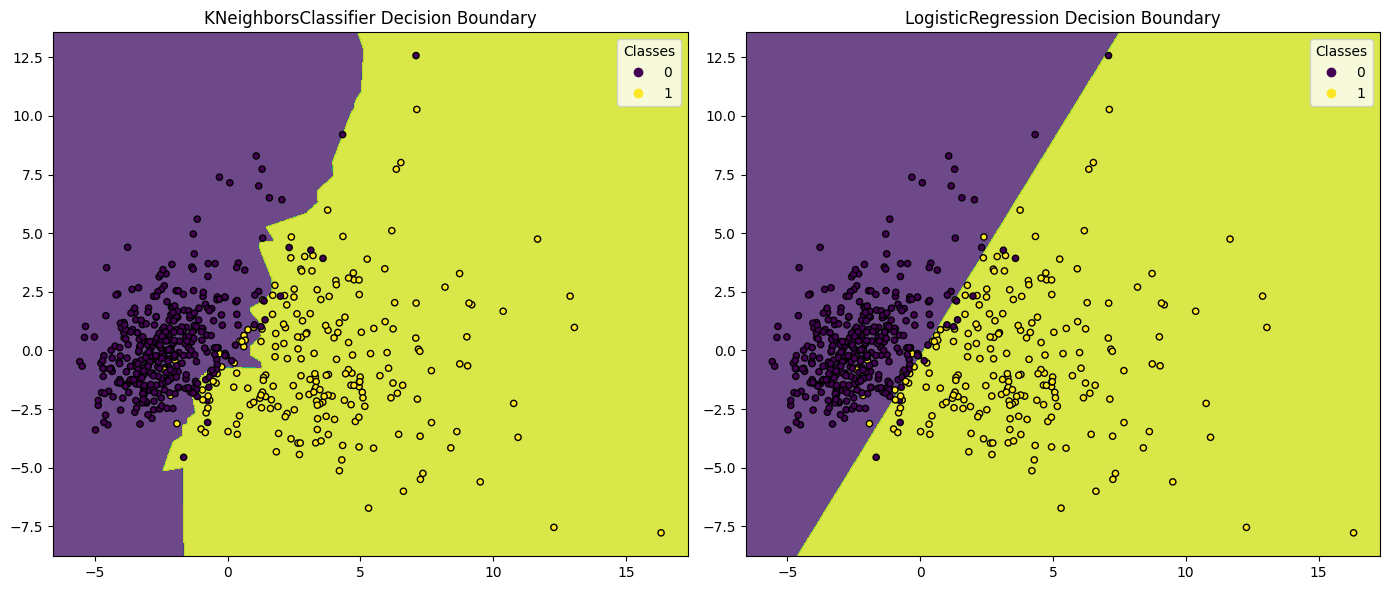

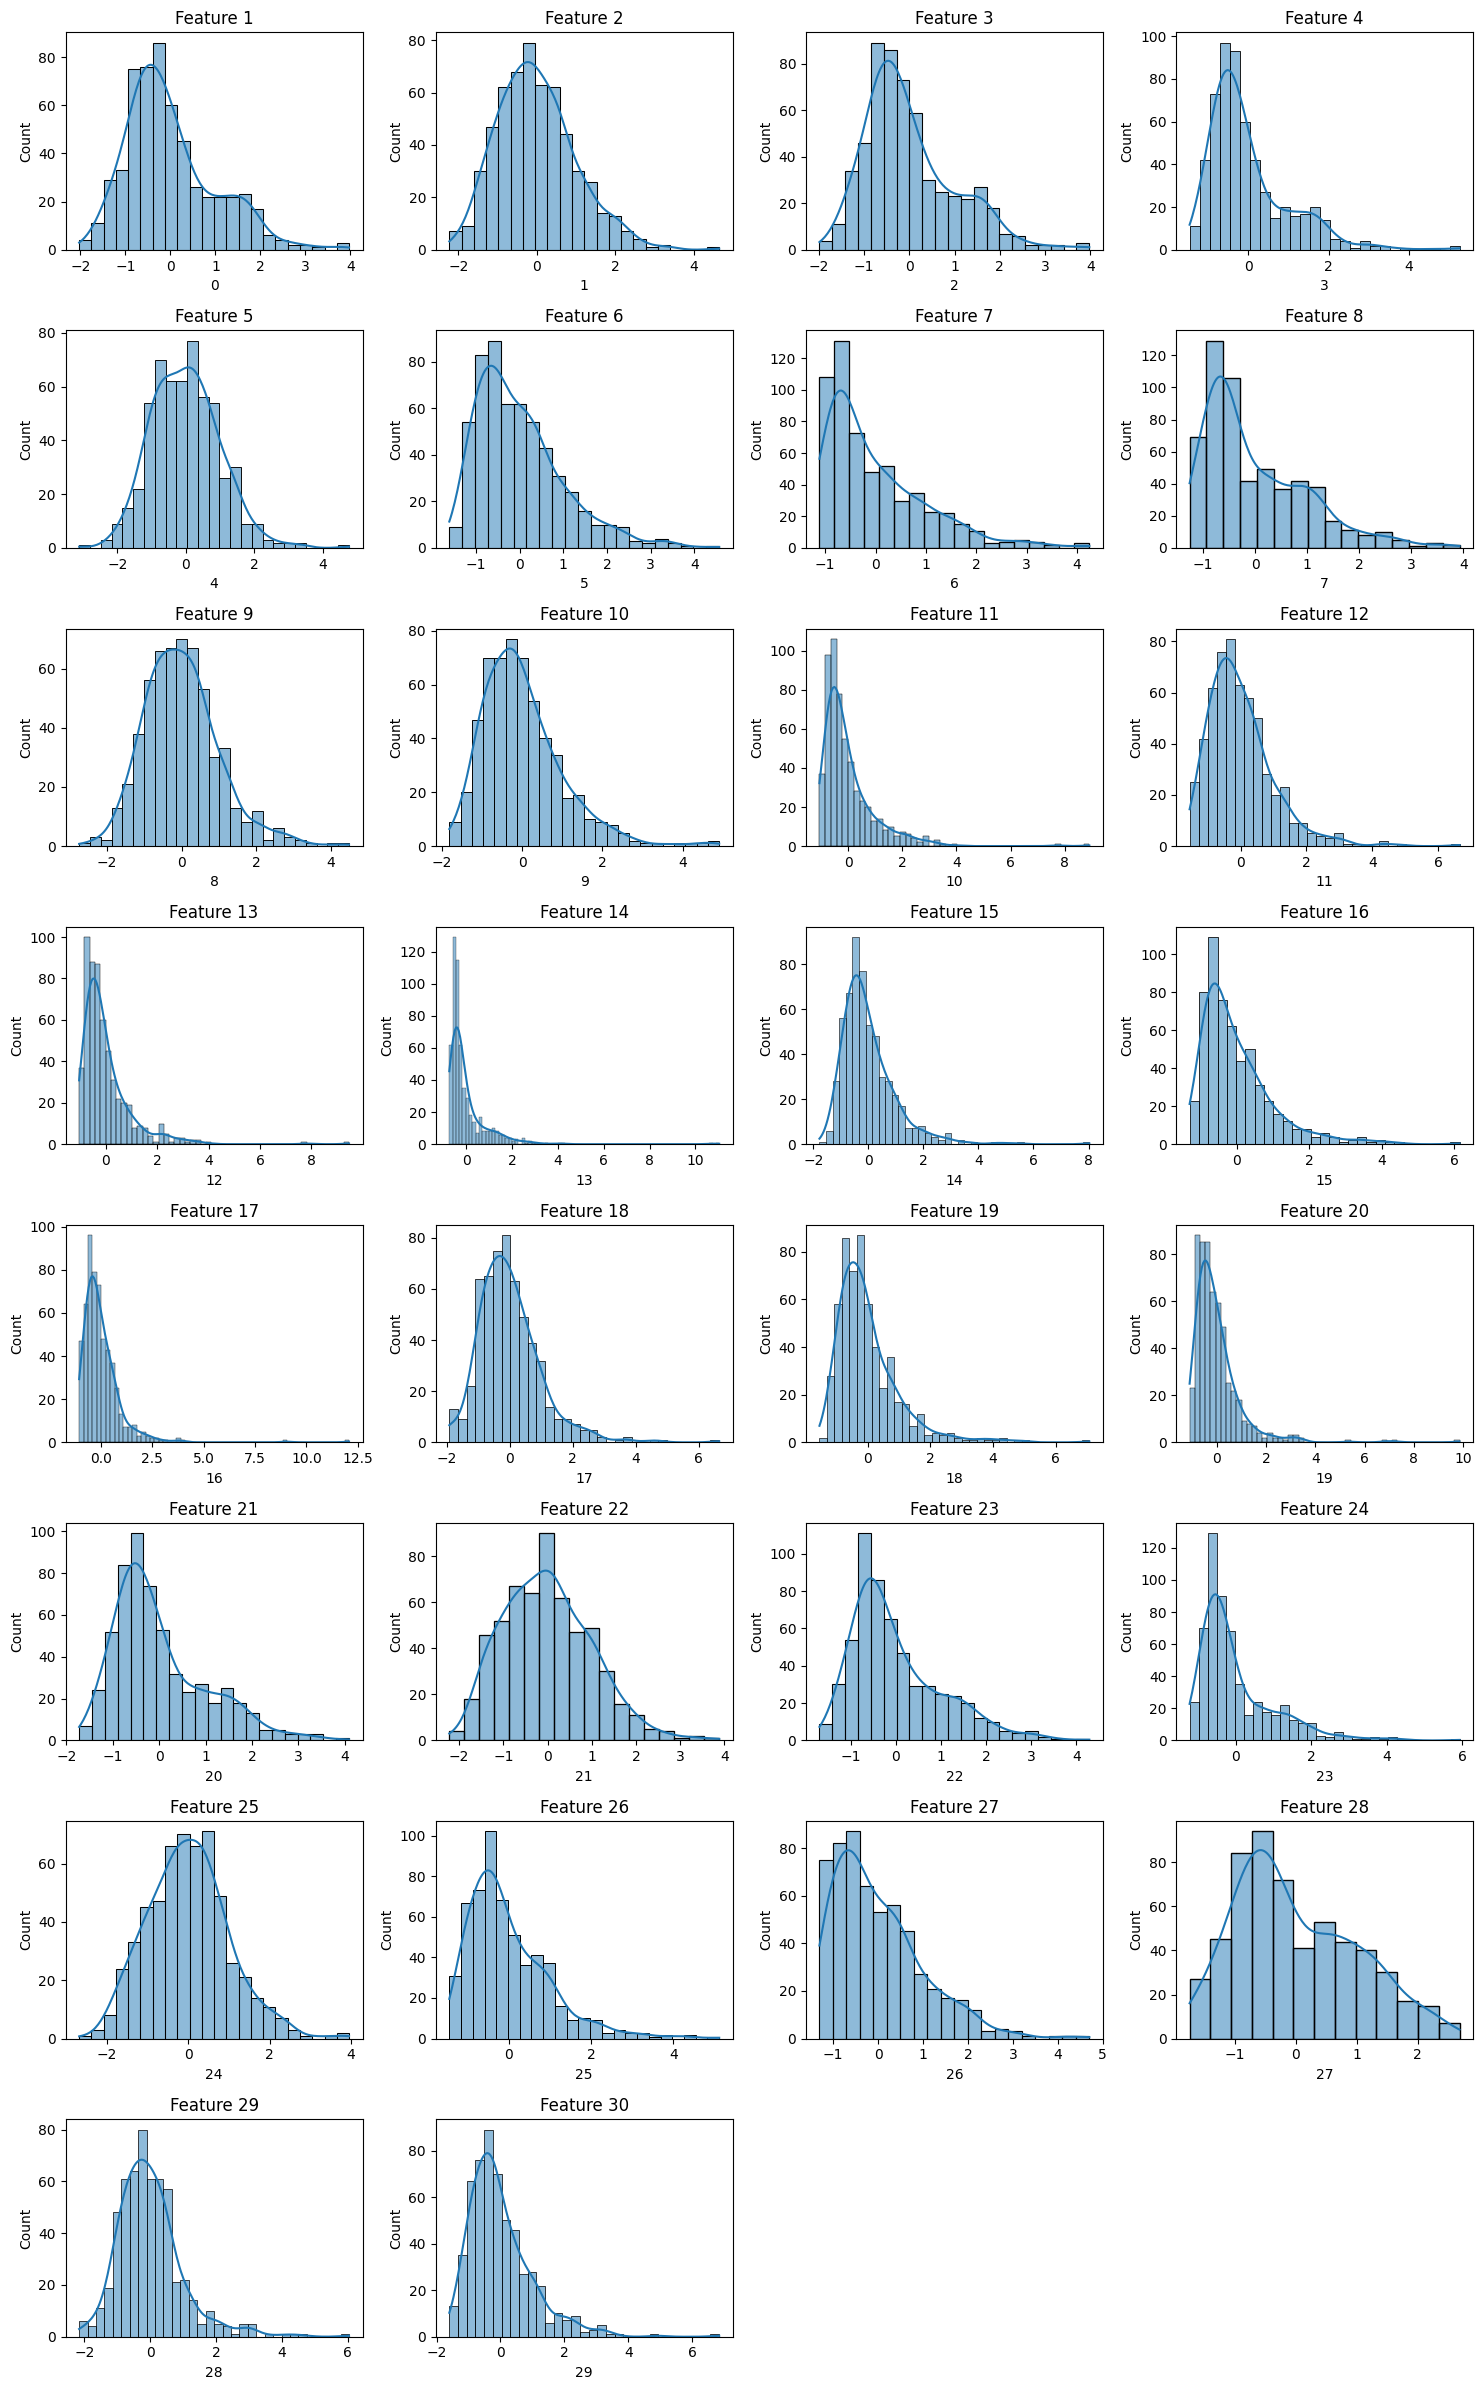

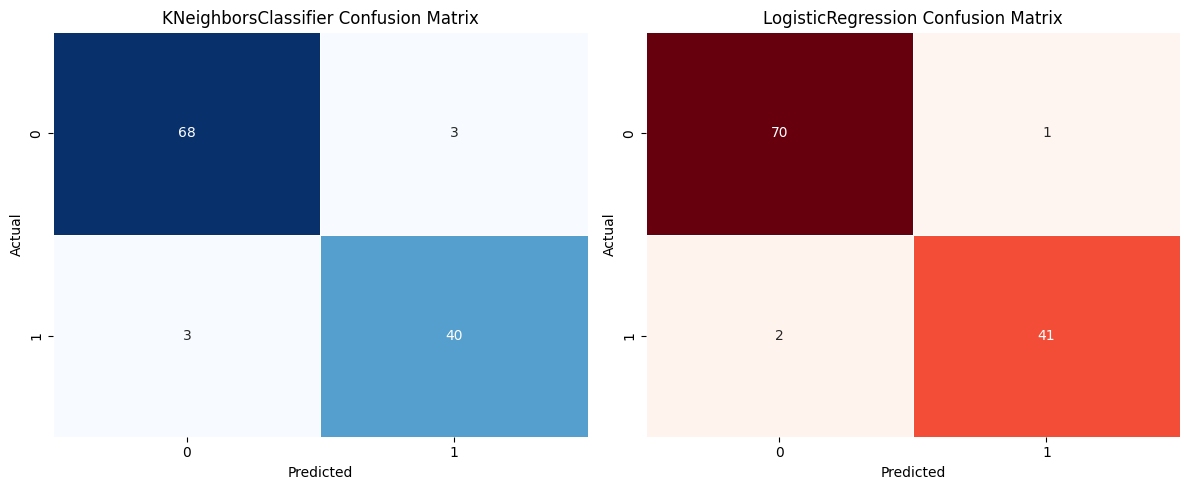

In [16]:
# @title # **Step 4: Report and Visualizations**

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("Breast Cancer Diagnosis Dataset with Tumor Characteristics.csv")

# Preprocess the dataset
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # Convert categorical target variable

# Drop irrelevant columns and scale features
features = df.drop(columns=['id', 'diagnosis'])  # Assuming 'id' is not needed
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, df['diagnosis'], test_size=0.2, random_state=42)

# Fit models on the training data
def fit_models(X_train, y_train):
    """Fit KNN and Logistic Regression models."""
    knn_model = KNeighborsClassifier(n_neighbors=3)
    log_reg_model = LogisticRegression(max_iter=1000)

    knn_model.fit(X_train, y_train)
    log_reg_model.fit(X_train, y_train)

    return knn_model, log_reg_model

# Predict and evaluate models
def evaluate_models(models, X_test, y_test):
    """Predict and print evaluation metrics for both models."""
    for model in models:
        y_pred = model.predict(X_test)
        print(f"\n### {model.__class__.__name__} Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print(f"\n### {model.__class__.__name__} Classification Report:")
        print(classification_report(y_test, y_pred))

# Visualize decision boundaries using PCA
def plot_decision_boundaries(X_scaled, y, models):
    """Plot decision boundaries for KNN and Logistic Regression."""
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)  # Transforming features for visualization

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    for ax, model in zip(axes, models):
        h = .02  # step size in the mesh
        x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
        y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Predict using inverse PCA transformation for mesh grid points
        Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.8)
        scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', s=20)
        ax.set_title(f'{model.__class__.__name__} Decision Boundary')
        ax.legend(*scatter.legend_elements(), title="Classes")

    plt.tight_layout()
    plt.show()

# Visualize feature distributions
def plot_feature_distributions(features_scaled):
    """Plot histograms of scaled features."""
    features_df = pd.DataFrame(features_scaled)
    num_features = features_df.shape[1]

    ncols = 4
    nrows = (num_features + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 3 * nrows))

    for i in range(num_features):
        sns.histplot(features_df[i], kde=True, ax=axes[i // ncols][i % ncols])
        axes[i // ncols][i % ncols].set_title(f'Feature {i + 1}')

    # Remove empty subplots if any
    for j in range(num_features, nrows * ncols):
        fig.delaxes(axes[j // ncols][j % ncols])

    plt.tight_layout()
    plt.show()

# Main execution flow
knn_model, log_reg_model = fit_models(X_train, y_train)
evaluate_models([knn_model, log_reg_model], X_test, y_test)

# Plot decision boundaries using PCA-transformed data for visualization only.
plot_decision_boundaries(features_scaled, df['diagnosis'], [knn_model, log_reg_model])

# Plot feature distributions
plot_feature_distributions(features_scaled)

# Visualize confusion matrices
def plot_confusion_matrices(y_test):
    """Plot confusion matrices for both models with different colors."""

    models = [knn_model , log_reg_model]

    fig, axes = plt.subplots(1, len(models), figsize=(12, 5))

    colors = ['Blues', 'Reds']

    for ax_color_index in range(len(models)):
        model = models[ax_color_index]

        # Get predictions from the model
        y_pred = model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)

        sns.heatmap(cm,
                    annot=True,
                    fmt='d',
                    cmap=colors[ax_color_index],
                    ax=axes[ax_color_index],
                    cbar=False,
                    linewidths=.5)

        axes[ax_color_index].set_title(f'{model.__class__.__name__} Confusion Matrix')
        axes[ax_color_index].set_xlabel('Predicted')
        axes[ax_color_index].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

# Call function to plot confusion matrices.
plot_confusion_matrices(y_test)